# Adi Setiadi Putra 202131023

# Word Segmentation

In [13]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread


In [14]:
def character_segmentation(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((3, 10), np.uint8)  
    dilated = cv2.dilate(thresh, kernel, iterations=1)

    contours, _ = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours_lines = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])

    img3 = img.copy()
    characters_list = []

    for line in sorted_contours_lines:
        x, y, w, h = cv2.boundingRect(line)
        roi_line = dilated[y:y + h, x:x + w]

        cnt, _ = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        sorted_contour_words = sorted(cnt, key=lambda cntr: cv2.boundingRect(cntr)[0])

        for word in sorted_contour_words:
            if cv2.contourArea(word) < 200:
                continue

            x2, y2, w2, h2 = cv2.boundingRect(word)

            roi_word = roi_line[y2:y2 + h2, x2:x2 + w2]
            cnt_chars, _ = cv2.findContours(roi_word.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            sorted_contour_chars = sorted(cnt_chars, key=lambda cntr: cv2.boundingRect(cntr)[0])

            for character in sorted_contour_chars:
                x3, y3, w3, h3 = cv2.boundingRect(character)

                char_x = x + x2 + x3
                char_y = y + y2 + y3
                char_w = w3
                char_h = h3

                characters_list.append([char_x, char_y, char_x + char_w, char_y + char_h])
                cv2.rectangle(img3, (char_x, char_y), (char_x + char_w, char_y + char_h), (0, 255, 255), 2)

    plt.imshow(img3)
    plt.show()

In [15]:
!pip freeze

anyio==3.6.2
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asttokens==2.2.1
attrs==22.2.0
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
certifi==2023.5.7
cffi==1.15.1
charset-normalizer==3.1.0
click==8.1.3
colorama==0.4.6
comm==0.1.2
contourpy==1.0.7
cycler==0.11.0
debugpy==1.6.6
decorator==5.1.1
defusedxml==0.7.1
easyocr==1.7.0
executing==1.2.0
fastjsonschema==2.16.3
filelock==3.12.2
fonttools==4.39.3
fqdn==1.5.1
idna==3.4
imageio==2.27.0
ipykernel==6.21.3
ipython==8.11.0
ipython-genutils==0.2.0
ipywidgets==8.0.4
isoduration==20.11.0
jedi==0.18.2
Jinja2==3.1.2
joblib==1.2.0
jsonpointer==2.3
jsonschema==4.17.3
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.6.3
jupyter_client==8.0.3
jupyter_core==5.2.0
jupyter_server==2.4.0
jupyter_server_terminals==0.4.4
jupyterlab-pygments==0.2.2
jupyterlab-widgets==3.0.5
kiwisolver==1.4.4
lazy_loader==0.2
MarkupSafe==2.1.2
matplotlib==3.7.1
matplotlib-inline==0.1.6
mistune==2.0.5
mpmath==1.3.0
nbclassic==0.5.3
nbclient

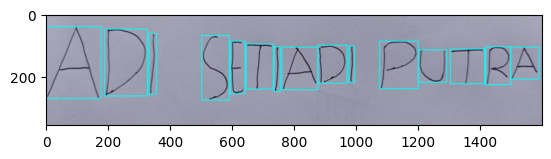

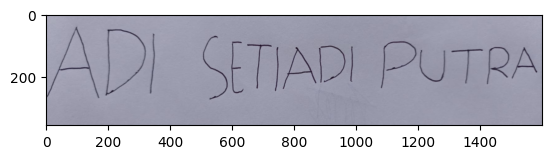

In [17]:
# Example usage
gambar = imread(fname="nama.jpg")

image_path = 'nama.jpg'
character_segmentation(image_path)

plt.imshow(gambar, cmap='gray')
